In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
customer_churn = pd.read_csv('customer_churn.csv')

# Data Exploration

In [24]:
customer_churn.head()
customer_churn.shape
customer_churn.describe()
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
customer_churn.columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
customer_churn['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [18]:
customer_churn.sample(n=20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6572,6258-PVZWJ,Male,0,Yes,No,68,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.80,6302.85,No
2768,1429-UYJSV,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,260.9,No
3177,1814-WFGVS,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,48.90,3527,No
1071,3097-NNSPB,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.05,91.1,Yes
2019,7694-VLBWQ,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Electronic check,104.10,7040.85,Yes
2081,5934-TSSAU,Female,0,Yes,Yes,23,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1702.9,No
1074,2111-DWYHN,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.10,21.1,No
959,5651-YLPRD,Female,0,Yes,Yes,32,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.10,2723.75,No
2888,7409-KIUTL,Female,1,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,71.00,71,Yes
463,3811-VBYBZ,Male,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,673.25,Yes


# Data Visulaization

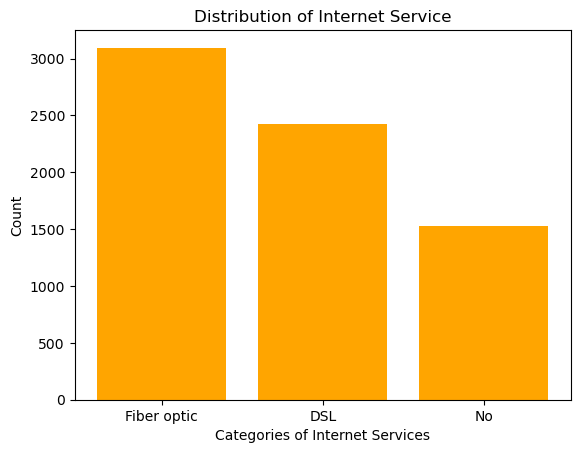

In [49]:
plt.bar(customer_churn['InternetService'].value_counts().keys(),customer_churn['InternetService'].value_counts().to_list(),color = 'orange')
plt.xlabel("Categories of Internet Services")
plt.ylabel("Count")
plt.title("Distribution of Internet Service")
plt.show()

Text(0.5, 1.0, 'Distribution of Tenure')

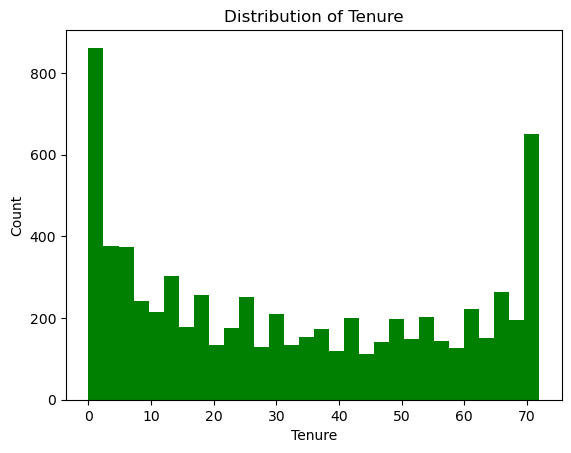

In [59]:
plt.hist(customer_churn['tenure'],bins=30,color = 'green')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')

Text(0.5, 1.0, 'Tenure Vs Monthly Charges')

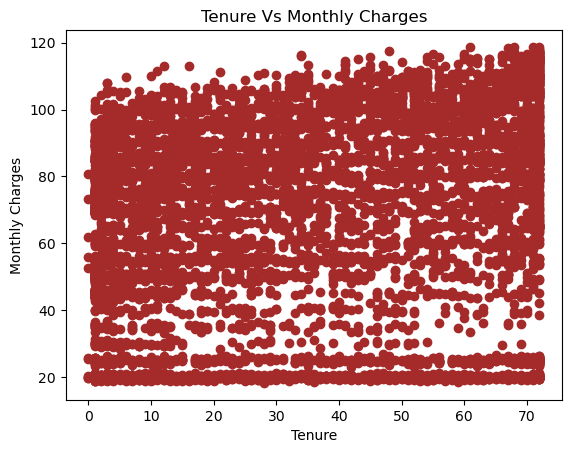

In [60]:
plt.scatter(customer_churn['tenure'],customer_churn['MonthlyCharges'],color = 'brown')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Tenure Vs Monthly Charges')

<Axes: title={'center': 'tenure'}, xlabel='[Contract]'>

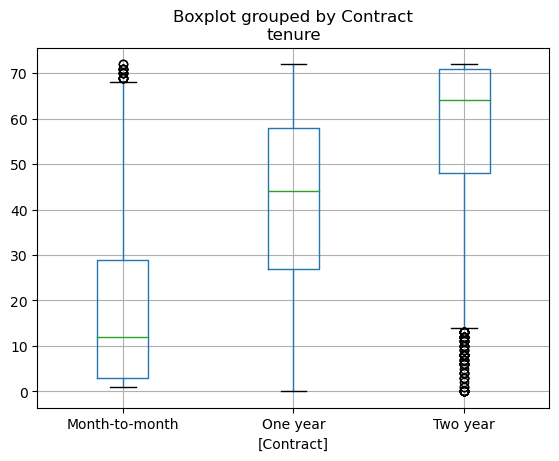

In [16]:
customer_churn.boxplot(column= ['tenure'],by=['Contract'])

# Building a linear regression model where independent variable is Tenure and the depenedent variable is Monthly Charges

In [85]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = customer_churn[['tenure']]
y = customer_churn[['MonthlyCharges']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)


In [84]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [81]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

29.394584027273893

# Building a logistic regression model where independent variable is Monthly Charges and the depenedent variable is Churn

In [108]:
from sklearn.linear_model import LogisticRegression
x = customer_churn[['MonthlyCharges']]
y = customer_churn[['Churn']]
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.35,random_state = 0)
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)


C:\Users\Seena.Tijo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

(array([[1815,    0],
        [ 651,    0]], dtype=int64),
 0.7360097323600974)

# Building a logistic regression model where independent variables are Monthly Charges and Tenure and the depenedent variable is Churn

In [105]:
from sklearn.linear_model import LogisticRegression
x = customer_churn[['MonthlyCharges','tenure']]
y = customer_churn[['Churn']]
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.20,random_state = 0)
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

C:\Users\Seena.Tijo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[934, 107],
        [212, 156]], dtype=int64),
 0.7735982966643009)

# Building a decision tree model where independent variable is Tenure and the depenedent variable is Churn

In [107]:
from sklearn.tree import DecisionTreeClassifier
x = customer_churn[['tenure']]
y = customer_churn[['Churn']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
des_tree = DecisionTreeClassifier()
des_tree.fit(x_train,y_train)
y_pred = des_tree.predict(x_test)
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

(array([[965,  76],
        [281,  87]], dtype=int64),
 0.7466288147622427)

# Building a random forest model where independent variable is Tenure and the depenedent variable is Churn

In [111]:
from sklearn.ensemble import RandomForestClassifier
x = customer_churn[['tenure']]
y = customer_churn[['Churn']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
ran_for = RandomForestClassifier()
ran_for.fit(x_train,y_train)
y_pred = ran_for.predict(x_test)
confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred)

C:\Users\Seena.Tijo\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(array([[965,  76],
        [281,  87]], dtype=int64),
 0.7466288147622427)